<a href="https://colab.research.google.com/github/anupa-aa/ML-AI-Courswork-Module/blob/master/Anupa_Adikary_Q_MNIST_PyTorch_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expectations: Please provide solutions to the questions in the cells at the end of the notebook.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models,transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary

In [ ]:
# MNIST
def mnist(batch_sz, valid_size=0.2, shuffle=True, random_seed=2000):
    num_classes = 10
    transform_train = transforms.Compose([
                        transforms.ToTensor(),
                    ])

    transform_valid = transforms.Compose([
                        transforms.ToTensor(),
                    ])

    transform_test = transforms.Compose([
                        transforms.ToTensor(),
                    ])


    # Training dataset
    train_data = MNIST(root='./datasets', train=True, download=True, transform=transform_train)
    valid_data = MNIST(root='./datasets', train=True, download=True, transform=transform_valid)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    if shuffle == True:
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_idx, valid_idx = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_sz, sampler=train_sampler,pin_memory=True)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_sz, sampler=valid_sampler,pin_memory=True)

    # Test dataset
    test_data = MNIST(root='./datasets', train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_sz, shuffle=False, pin_memory=True)

    return train_loader, valid_loader, test_loader



In [ ]:
# Q1: create a dataloader and get a batch

In [ ]:
batch_sz=64 # this is batch size i.e. the number of rows in a batch of data
train_loader, valid_loader, test_loader=mnist(batch_sz)

100%|██████████| 9912422/9912422 [00:00<00:00, 112491135.46it/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 37854904.32it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27198578.69it/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21190799.52it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [ ]:
batch = next(iter(train_loader))

In [ ]:
batch[0].shape

torch.Size([64, 1, 28, 28])

In [ ]:
#Q2: Define a CNN with 2 conv layer and 2 linear layers for mnist digit classification

# 2 conv layers 8, 16, ---> NN--> 100, 10
class My_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 8, 3, 1)
    self.conv2 = nn.Conv2d(8,16,3,1)#Todo in_channels=8, out_channels=16, filter_size=3, stride=1

    self.linear1 = nn.Linear(25*16, 100) #Todo linear 25*16 -> 100
    self.linear2 = nn.Linear(100,10) #Todo linear 100 ->10

  def forward(self, x):
    # x-->(bs, 1, 28,28)
    x = self.conv1(x)
    x = torch.relu(x)
    # x -->(bs,8, 26,26)
    x = F.max_pool2d(x, (2,2))
    # x -->(bs,8, 13,13)
    x = self.conv2(x)#Todo layer
    x = F.relu(x)#Todo activation
    # x -->(bs,16, 11,11)
    x = F.max_pool2d(x, (2,2)) #Todo pooling
    # x -->(bs,16, 5,5)
    x = x.view(x.size(0), -1) #Todo # reshape the dimension
    x = self.linear1(x)#Todo linear 25*16 -> 100
    x = F.relu(x) #Todo activation
    x = self.linear2(x)#Todo linear 100 ->10

    return x









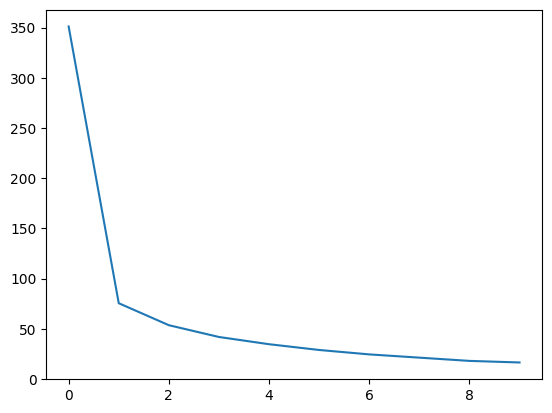

In [ ]:
#Q3: Train CNN for 10 epochs

# fixing a device to run the codes on
device = torch.device("cuda:0")
# creating a instance of My_CNN and moiving it to the device
net = My_CNN().to(device)#Todo Creeat network and move it to device
lr = 0.1
#creating an sgd optimizer for my network
opt = optim.SGD(net.parameters(), lr= lr)
num_tikrar = 10
ls =[]
for i in range(num_tikrar):
  total_loss = 0
  for batch in train_loader:
    #extractign data and labels from batch
    X,y = batch[0].to(device), batch[1].to(device)
    #doing the forward pass through the networks
    yhat = net(X)
    #calculating the loss
    loss = F.cross_entropy(yhat, y)
    #empyting the buffers to the store the gradients
    opt.zero_grad()
    #backward pass to calculate the gradietns
    loss.backward()
    #optimizing: taking a step in the negative gradient direction
    #Todo
    opt.step()
    total_loss+= loss.item()
  ls.append(total_loss)

plt.plot(ls)



In [ ]:
layer1 = net.cpu().conv1.weight.detach()
layer2 = net.cpu().conv2.weight.detach()

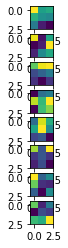

In [ ]:
k=0
for i in range(layer1.shape[0]):
  for j in range(layer1.shape[1]):
    k+=1
    plt.subplot(layer1.shape[0],layer1.shape[1], k)
    plt.imshow(layer1[i,j,:,:])


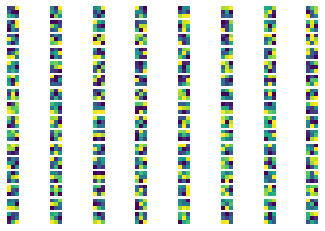

In [ ]:
k=0
for i in range(layer2.shape[0]):
  for j in range(layer2.shape[1]):
    k+=1
    plt.subplot(layer2.shape[0],layer2.shape[1], k)
    plt.imshow(layer2[i,j,:,:])
    plt.axis("off")
